In [58]:

import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/yosa_data.csv')

df.head()


,Age,Gender,Employed,Housing_Status,Education_Level,Used_Before_Puberty,Polysubstance_Use,HIV_Status,Chronic_Illness,Single_Parent_Household,Prior_Rehab,Race,Substance_Use_Duration_Years,Treatment_Type,Arrest_History,Marital_Status,Completed_Counselling
0,44,Male,Unemployed,Stable,No Schooling,No,Yes,Positive,No,Yes,Yes,Coloured,20,Voluntary,No,Married,No
1,57,Female,Employed,Stable,Secondary,No,Yes,Negative,No,Yes,No,Indian,21,Court-mandated,Yes,Single,Yes
2,52,Male,Unemployed,Unstable,Secondary,No,Yes,Negative,No,Yes,No,White,27,Voluntary,No,Divorced,No
3,49,Male,Unemployed,Homeless,Tertiary,No,Yes,Negative,No,Yes,Yes,Other,31,Court-mandated,Yes,Divorced,No
4,60,Male,Employed,Homeless,No Schooling,No,No,Negative,No,Yes,Yes,Black,20,Voluntary,Yes,Married,No


# Distributions

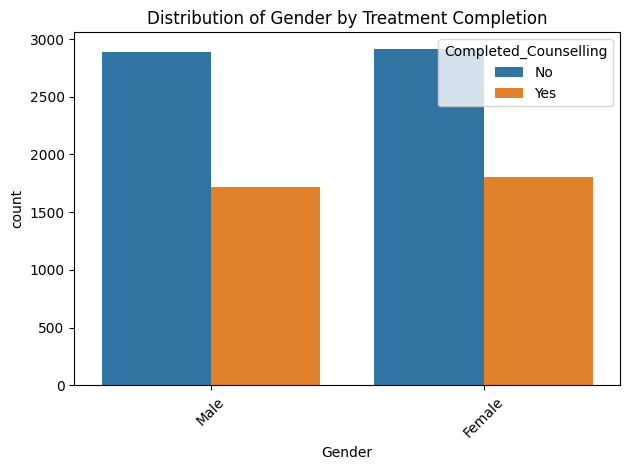

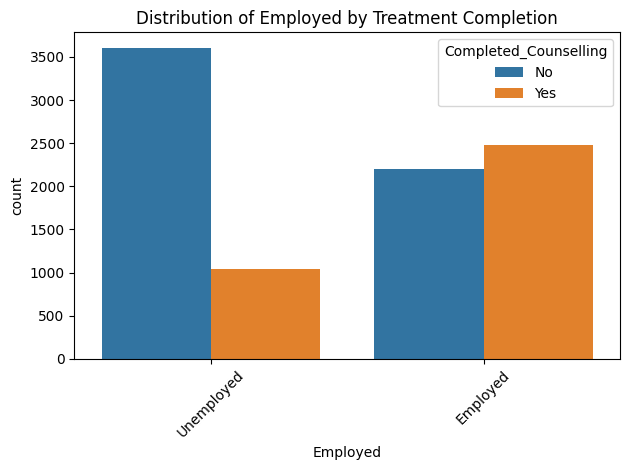

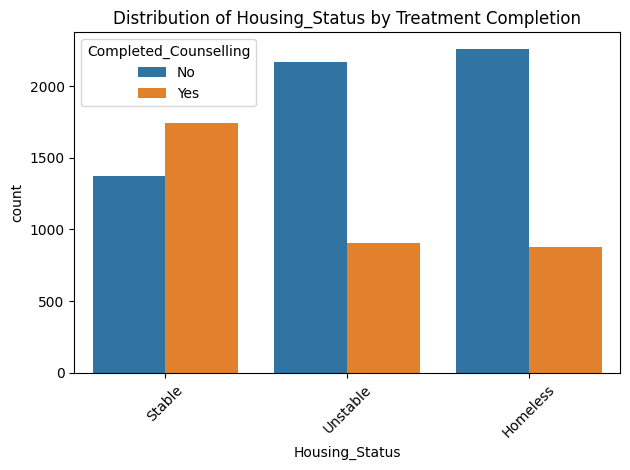

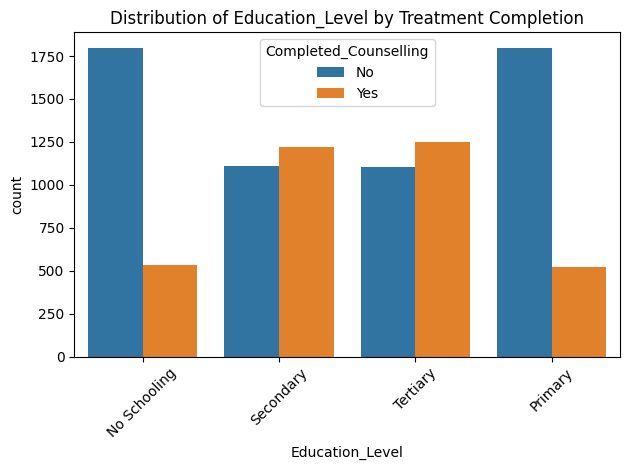

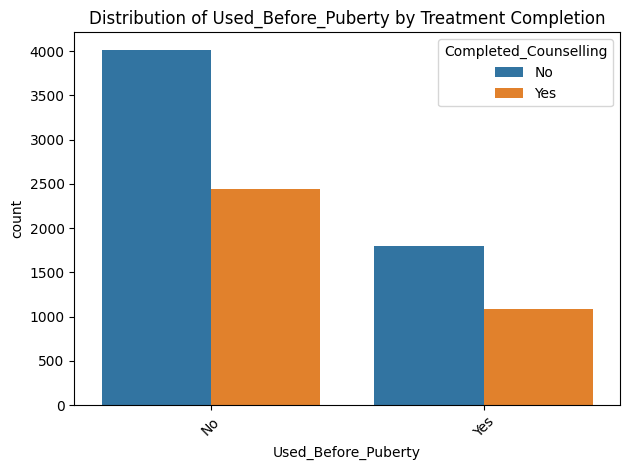

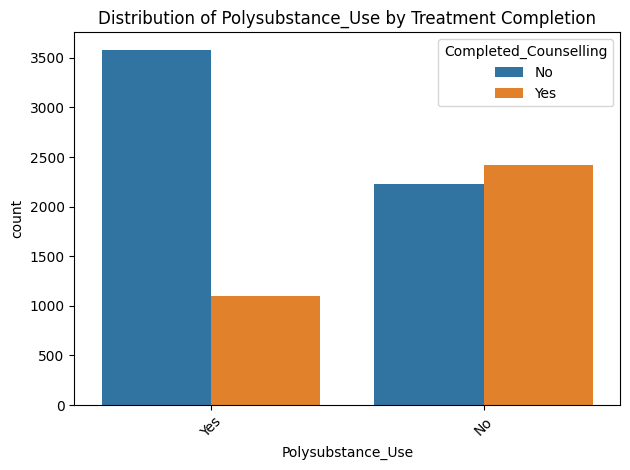

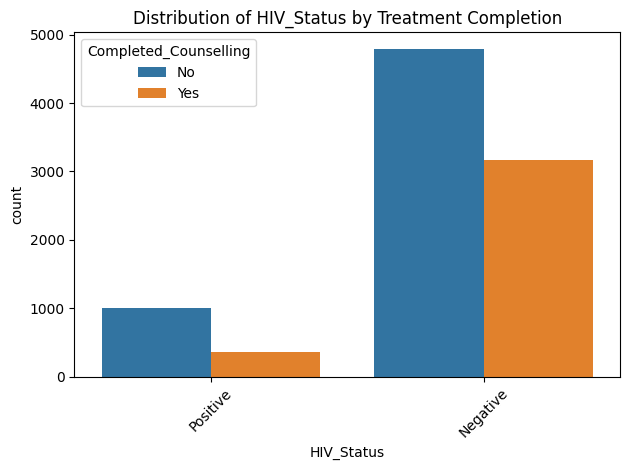

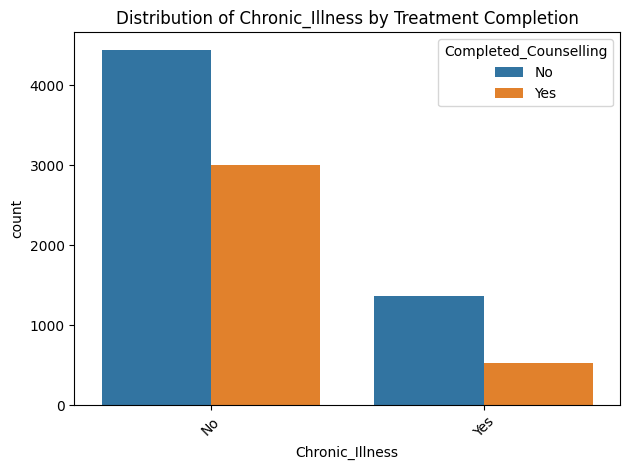

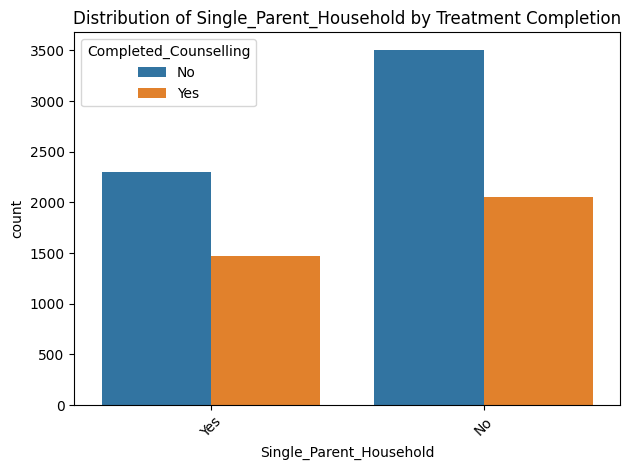

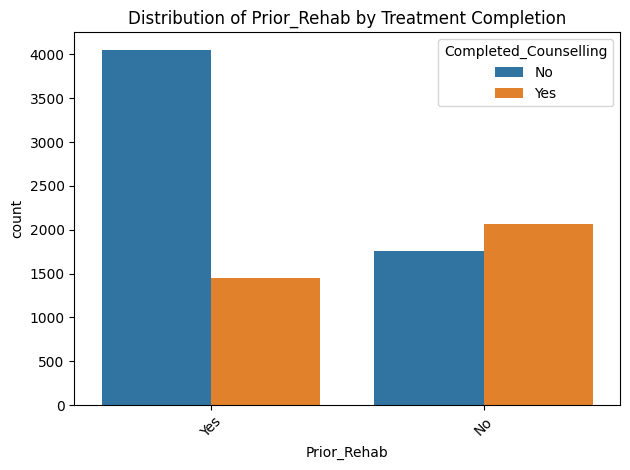

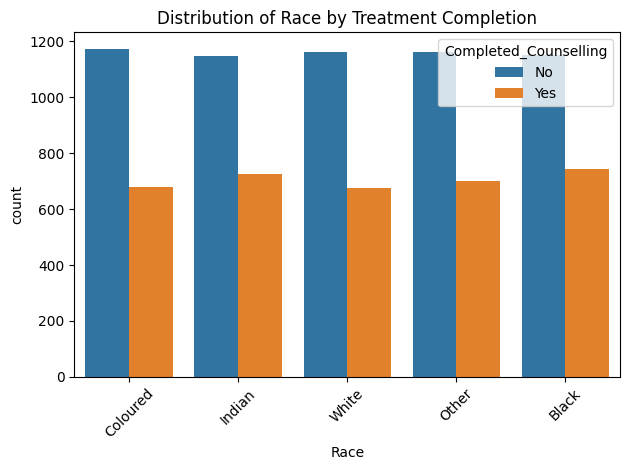

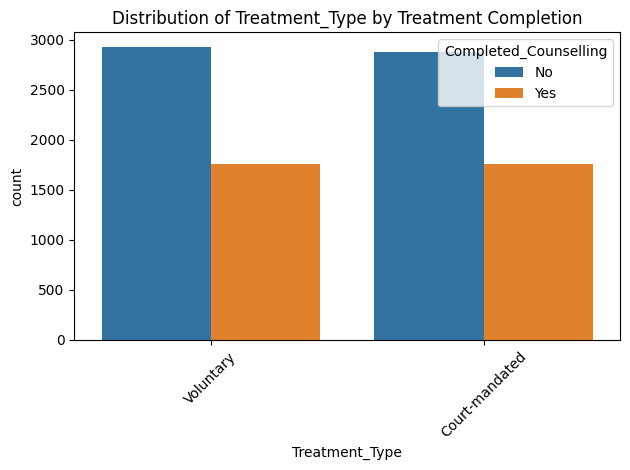

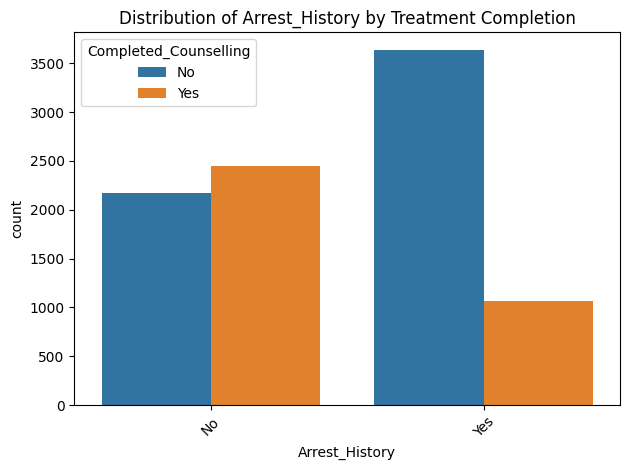

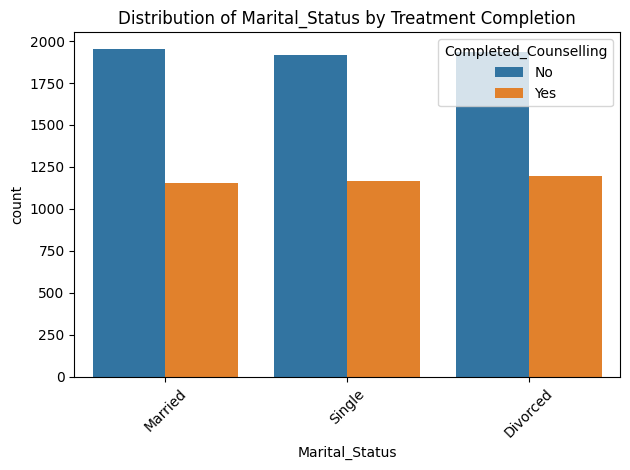

In [45]:
for feature in categorical_features:
    plt.figure()
    sns.countplot(data=df, x=feature, hue='Completed_Counselling')
    plt.title(f'Distribution of {feature} by Treatment Completion')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [59]:
# Encode the class 'Completed_Counselling'

df['Completed_Counselling'] = df['Completed_Counselling'].map({'Yes': 1, 'No': 0}) # Create one hot encoder



# Feature Importance

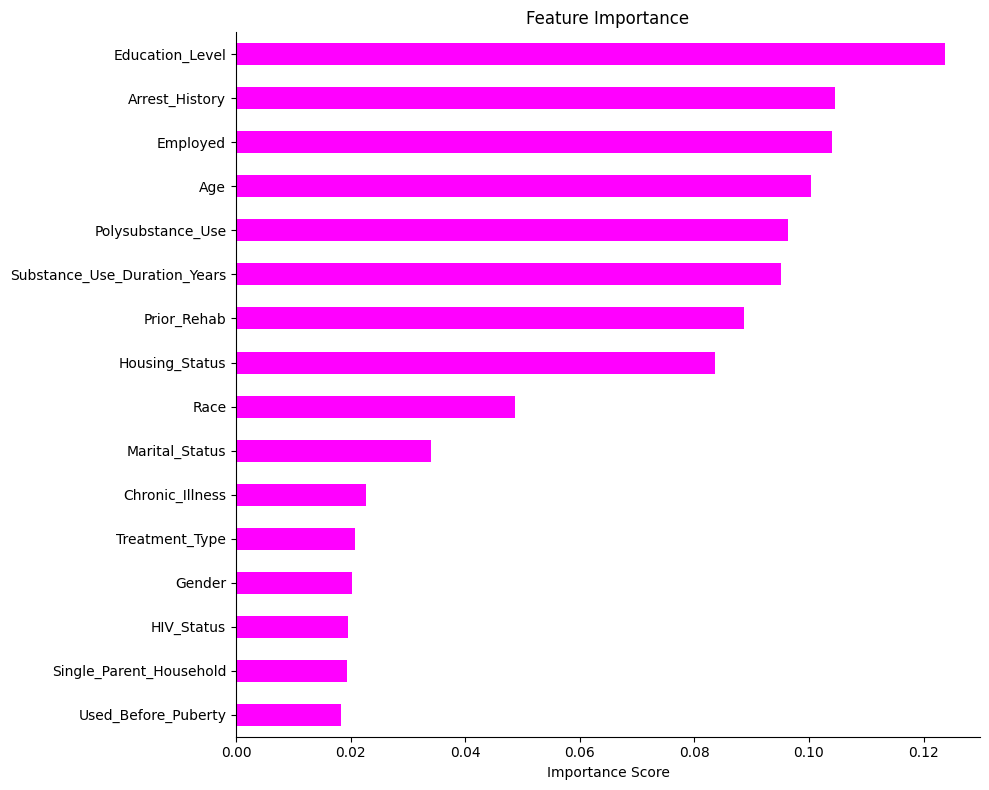

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier



# Encode categorical features
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le





X = df.drop('Completed_Counselling', axis=1)
y = df['Completed_Counselling']

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

#feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)


fig, ax = plt.subplots(figsize=(10, 8))
importances.plot(kind='barh', color='magenta', ax=ax)
ax.set_title('Feature Importance')
ax.set_xlabel('Importance Score')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

# Correlation between features

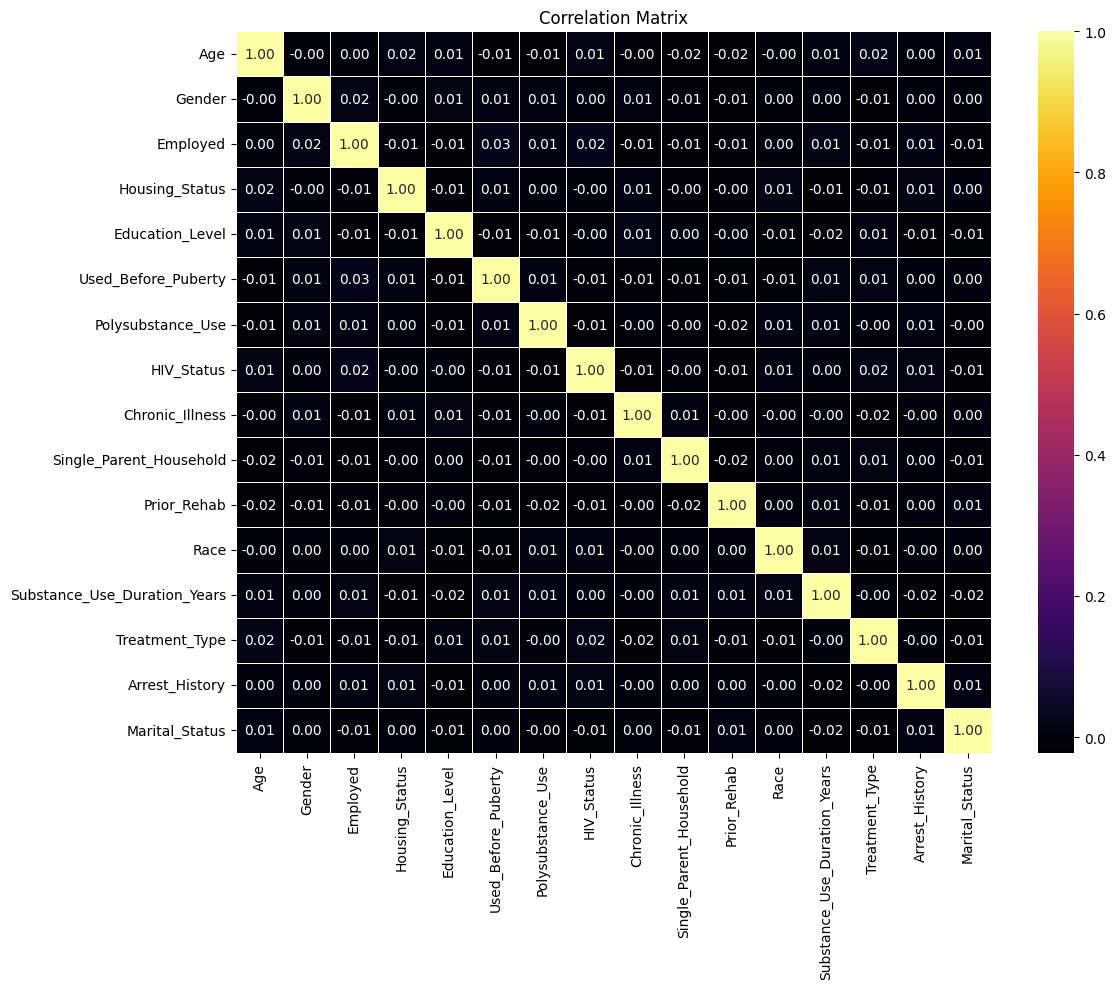

In [64]:
df = df.drop(columns=['Completed_Counselling'])
corr_matrix = df.corr()

# Sns heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# The model

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


368/368 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6762 - loss: 0.6153 - val_accuracy: 0.7963 - val_loss: 0.4012
Epoch 2/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8264 - loss: 0.3866 - val_accuracy: 0.8285 - val_loss: 0.3629
Epoch 3/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8382 - loss: 0.3527 - val_accuracy: 0.8285 - val_loss: 0.3522
Epoch 4/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8430 - loss: 0.3332 - val_accuracy: 0.8331 - val_loss: 0.3397
Epoch 5/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8485 - loss: 0.3115 - val_accuracy: 0.8315 - val_loss: 0.3184
Epoch 6/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8592 - loss: 0.2935 - val_accuracy: 0.8407 - val_loss: 0.3019
Epoch 7/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8595 - loss: 0.2872 - val_accuracy: 0.8377 - val_loss: 0.2959
Epoch 8/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8645 - loss: 0.2754 - val_accuracy: 0.837

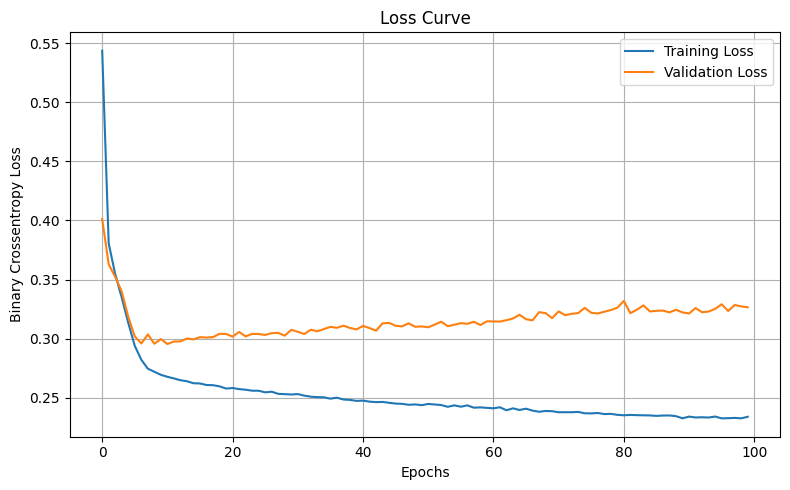

In [65]:


# Scale the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# THE NEURAL NETWORK
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1 , verbose = 1)

# evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# The DNN Output

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


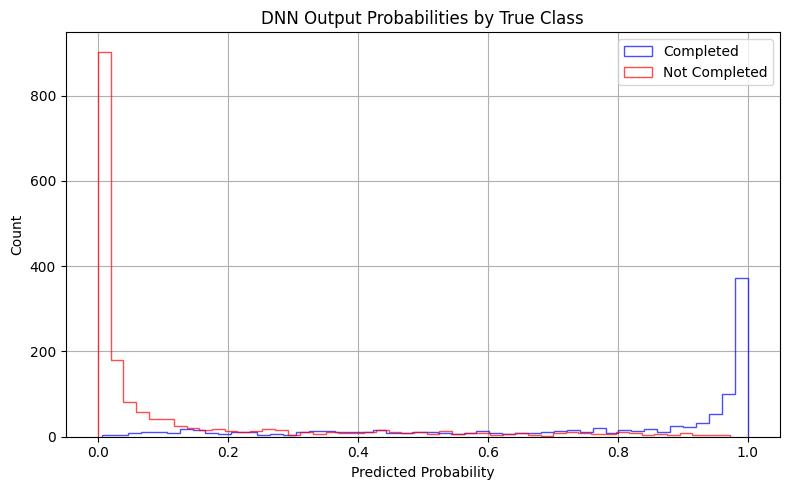

In [68]:
# Get raw prediction probabilities
y_probs = model.predict(X_test).flatten()

# separate by actual class
completed_probs = y_probs[y_test == 1]
not_completed_probs = y_probs[y_test == 0]


plt.figure(figsize=(8, 5))
plt.hist(completed_probs, bins=50, alpha=0.7, label='Completed', edgecolor='blue' , histtype = 'step')
plt.hist(not_completed_probs, bins=50, alpha=0.7, label='Not Completed', edgecolor='red' , histtype = 'step')
plt.title('DNN Output Probabilities by True Class')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# The Roc Curve

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


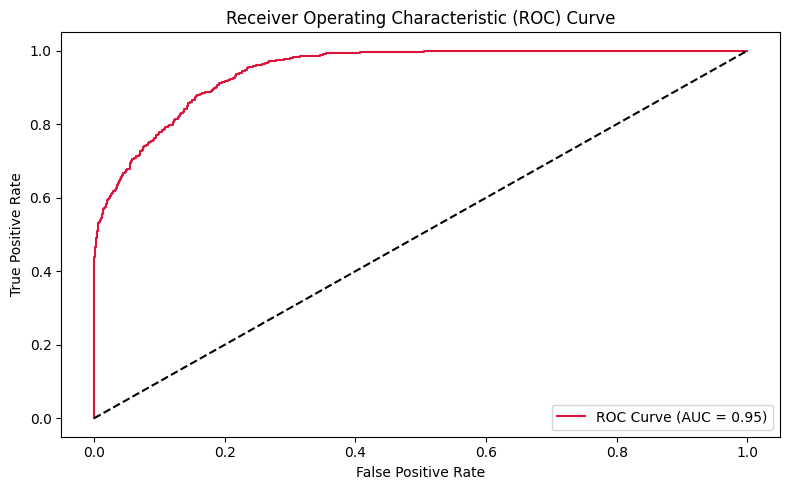

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score


y_probs = model.predict(X_test).flatten()

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})',color='crimson')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


# Exploring Decision Trees

Accuracy: 0.8428954423592493

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1153
           1       0.74      0.90      0.81       712

    accuracy                           0.84      1865
   macro avg       0.84      0.85      0.84      1865
weighted avg       0.86      0.84      0.84      1865


Confusion Matrix:
[[933 220]
 [ 73 639]]


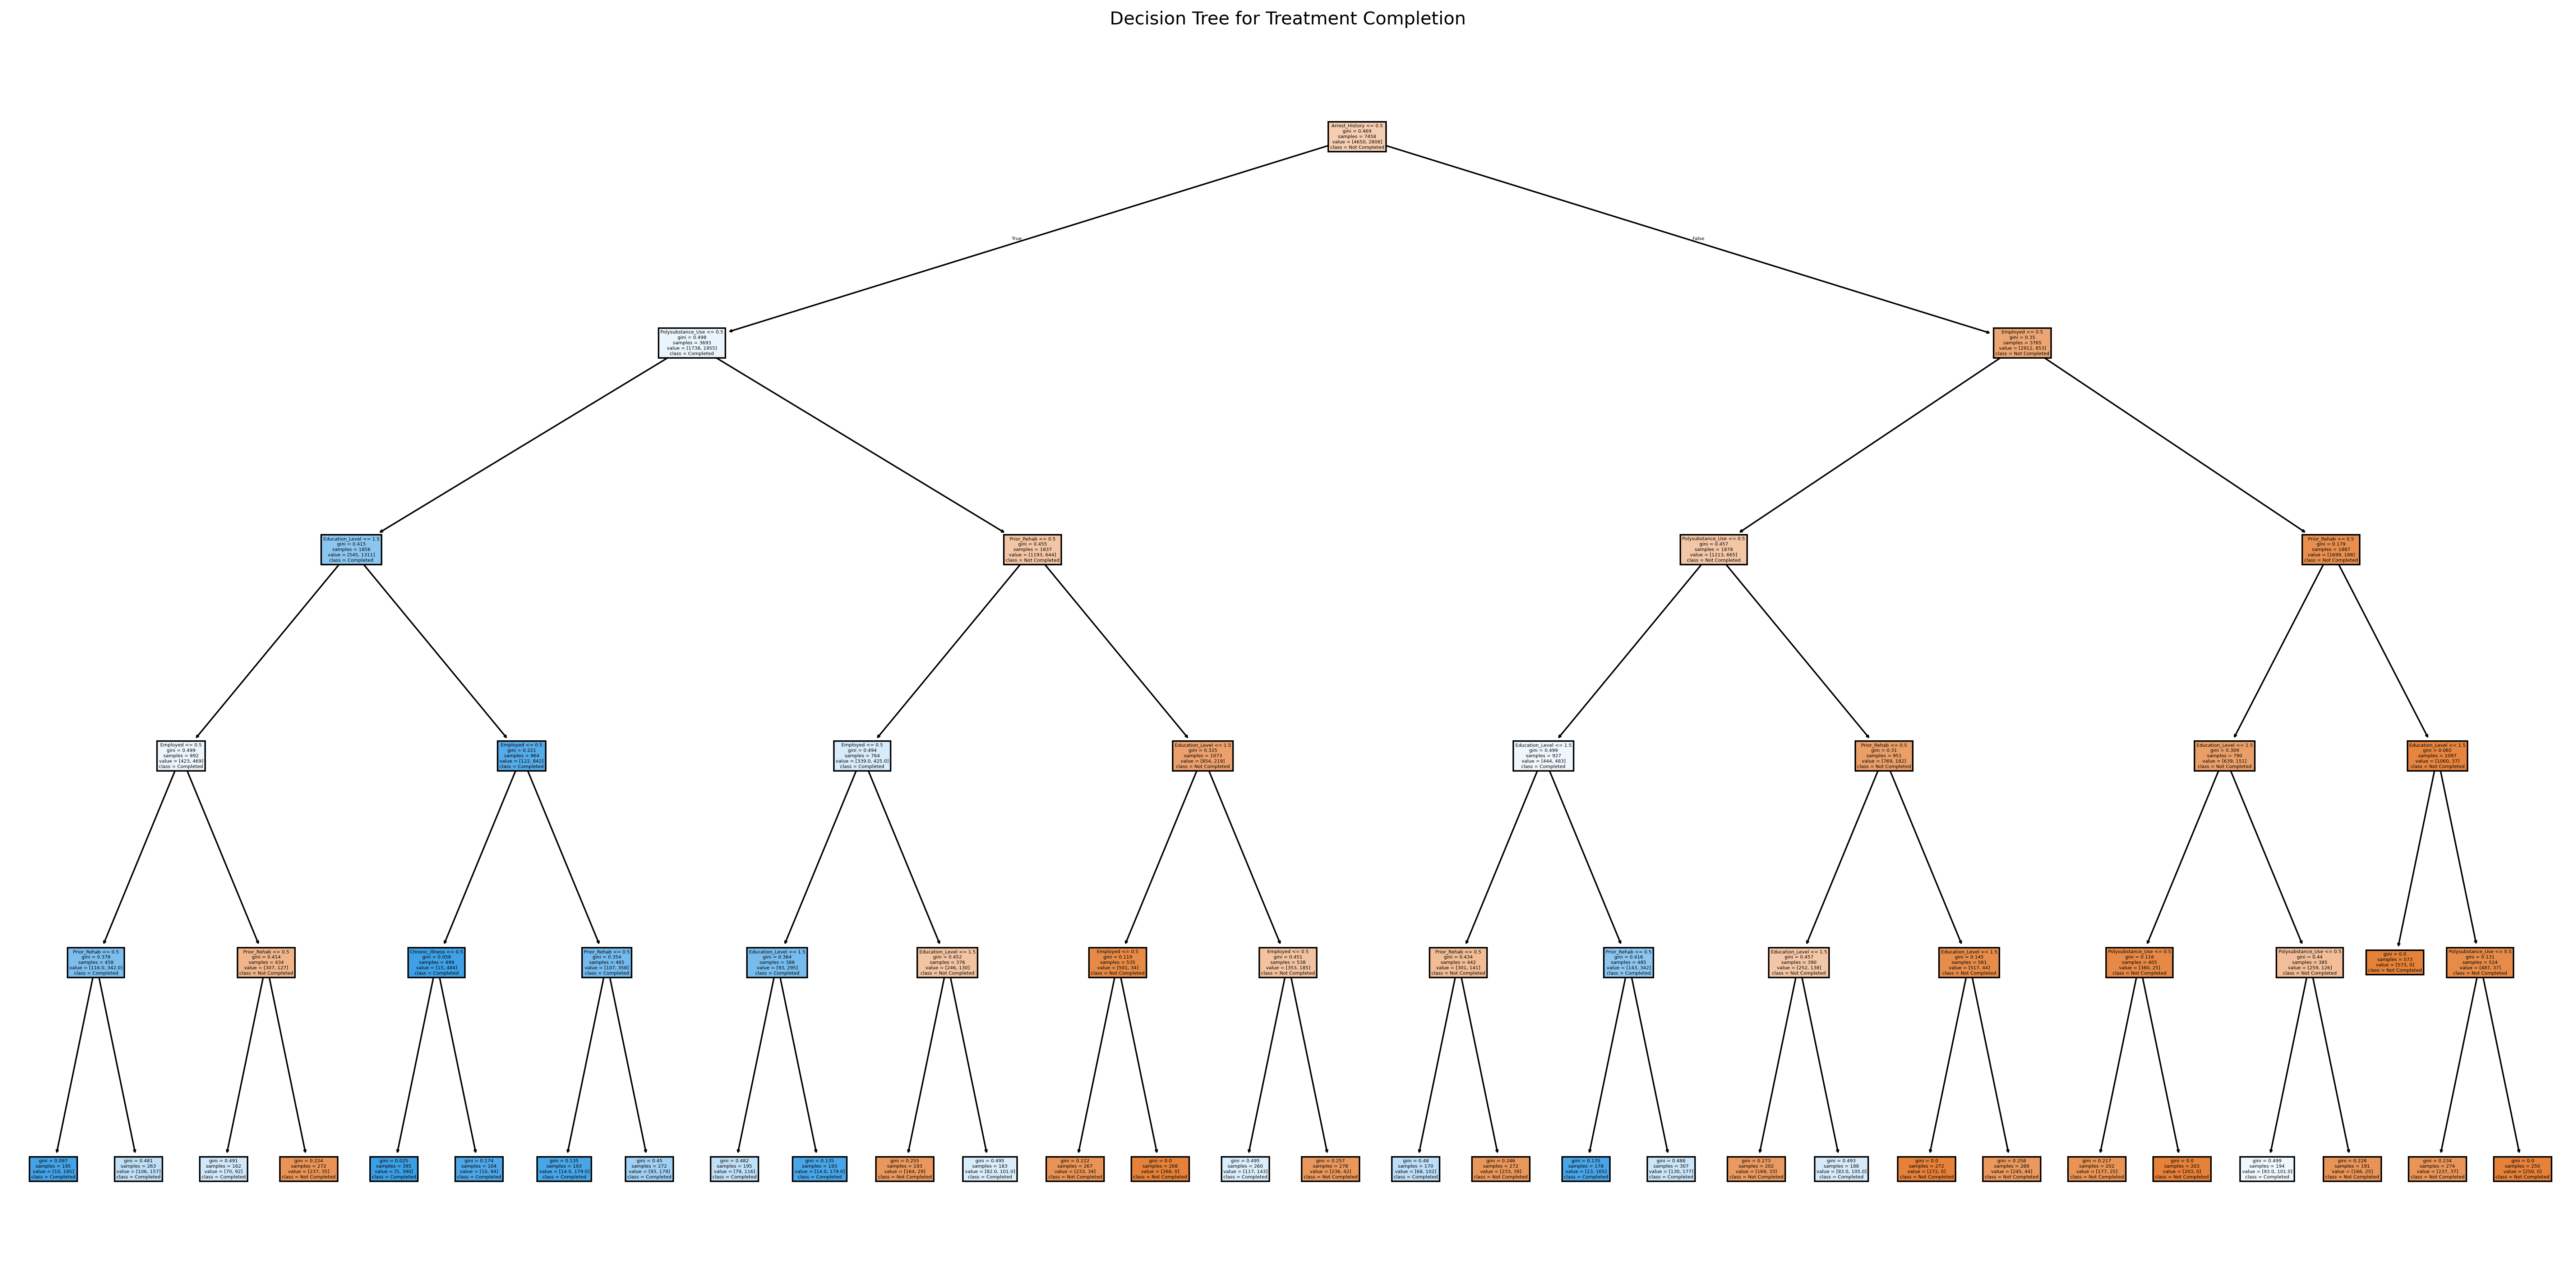

In [71]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# THE DECISION TREE
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)


y_pred = tree.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize Tree
plt.figure(figsize=(24, 12), dpi=300)
plot_tree(tree, feature_names=X.columns, class_names=['Not Completed', 'Completed'], filled=True)
plt.title("Decision Tree for Counselling Completion")
plt.tight_layout()
plt.show()
